In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [70]:
# load the data
stone = pd.read_csv('/Users/zhangyingying/Downloads/StoneFlakes.csv')
stone.head()

,ID,LBI,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,ar,?,35.3,2.60,?,42.4,24.2,47.1,69
1,arn,1.23,27.0,3.59,122,0,40,40,30
2,be,1.24,26.5,2.90,121,16,20.7,29.7,72
3,bi1,1.07,29.1,3.10,114,44,2.6,26.3,68
4,bi2,1.08,43.7,2.40,105,32.6,5.8,10.7,42


In [78]:
# check data type
stone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 78
Data columns (total 9 columns):
ID       73 non-null object
LBI      73 non-null object
RTI      73 non-null float64
WDI      73 non-null float64
FLA      73 non-null object
PSF      73 non-null object
FSF      73 non-null object
ZDF1     73 non-null object
PROZD    73 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


In [86]:
# replace missing data and delete rows with missing data
stone.replace('?', np.nan, inplace=True)
stone.dropna(inplace=True)
stone = stone.iloc[:,1:-1]

In [87]:
# change the data type to float
data = pd.DataFrame(stone, dtype='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 78
Data columns (total 7 columns):
LBI     73 non-null float64
RTI     73 non-null float64
WDI     73 non-null float64
FLA     73 non-null float64
PSF     73 non-null float64
FSF     73 non-null float64
ZDF1    73 non-null float64
dtypes: float64(7)
memory usage: 4.6 KB


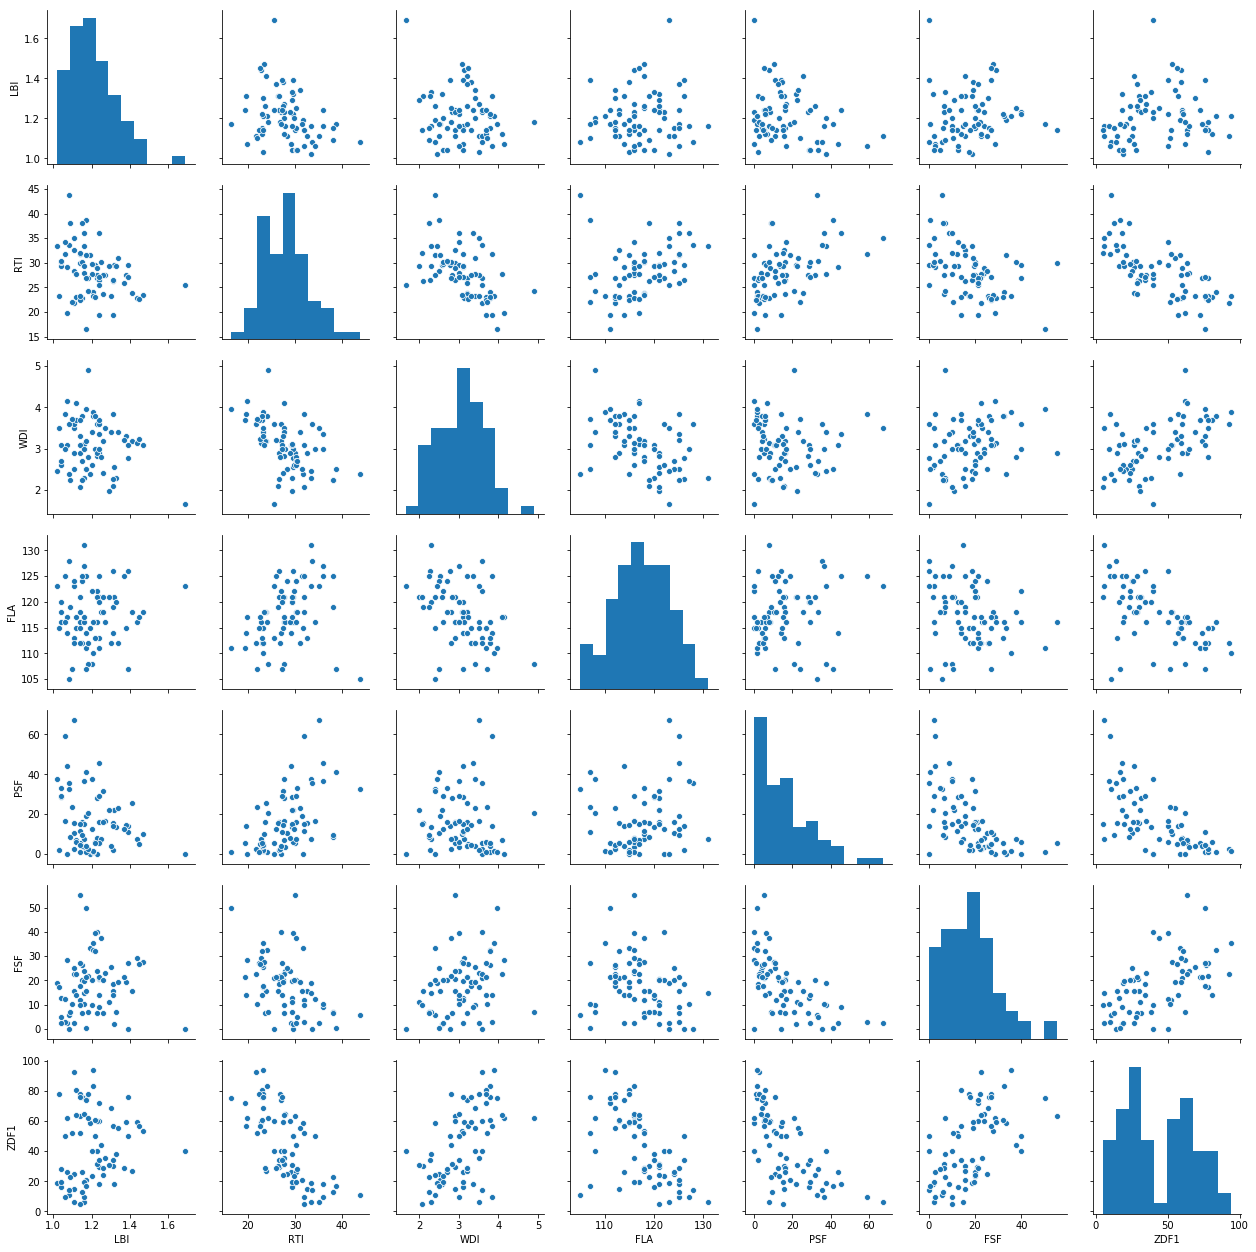

In [89]:
sns.pairplot(data)

In [91]:
# try different cluster number and claculate the error
cluster_num = range(1,10)
cluster_errors=[]
for cluster in cluster_num:
    knn = KMeans(n_clusters=cluster)
    knn.fit(data)
    cluster_errors.append(knn.inertia_)

cluster_df_er = pd.DataFrame({'num_cluster':cluster_num,'cluster_error': cluster_errors})
cluster_df_er

,num_cluster,cluster_error
0,1,70721.638688
1,2,28199.395201
2,3,21660.984101
3,4,16994.356971
4,5,14013.009054
5,6,12335.740778
6,7,11115.856319
7,8,9982.586309
8,9,8837.945211


In [101]:
# reduce the dimension of the data
pca = PCA(n_components=2)
pca.fit(data)
new_data = pca.transform(data)
df = pd.DataFrame(data = new_data, columns = ['component_1', 'component_2'])
df.head()

,component_1,component_2
0,-9.563041,24.815886
1,11.158375,8.680938
2,30.386251,-19.517203
3,38.869845,-4.263794
4,-0.031251,-9.040502


In [111]:
# knn choose 5 cluster here
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y_predict= kmeans.predict(df)
centers = kmeans.cluster_centers_

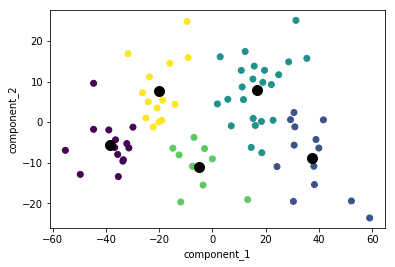

In [115]:
# plot the five clusters and their center points
plt.scatter(df.component_1, df.component_2, c=y_predict)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()